In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head(10)

,Length,Width,Thickness,Working Width,Epoch
0,14.418594,4.492233,6.228045,2.746836,4.573289
1,6.416955,10.661753,4.346087,3.949203,2.676545
2,6.583058,12.082281,4.472702,3.142853,8.083503
3,14.280348,5.111007,5.646974,3.025639,5.414505
4,15.121059,1.927749,2.046204,2.423817,7.614661
5,5.404853,4.228419,2.033189,1.528347,5.691051
6,15.568509,8.344746,9.092434,2.329226,5.109392
7,11.139750,4.461628,4.831434,2.404214,2.264130
8,6.960213,6.638441,2.116817,0.342207,4.502793
9,16.108227,1.897144,1.799735,2.363544,9.345614


In [5]:
data.shape

(500, 5)

In [6]:
data.describe()

,Length,Width,Thickness,Working Width,Epoch
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.785831,5.905237,3.093546,2.666898,5.753872
std,3.960396,3.017368,2.120724,1.168797,2.411055
min,4.062280,1.765692,0.690370,0.116673,1.017801
25%,6.948882,3.724303,1.627517,2.008470,4.031310
50%,11.269112,5.464779,2.069157,2.465055,5.711660
75%,14.171209,8.320455,4.837683,3.804134,7.341509
max,20.474997,13.392292,9.272603,5.288019,13.983360


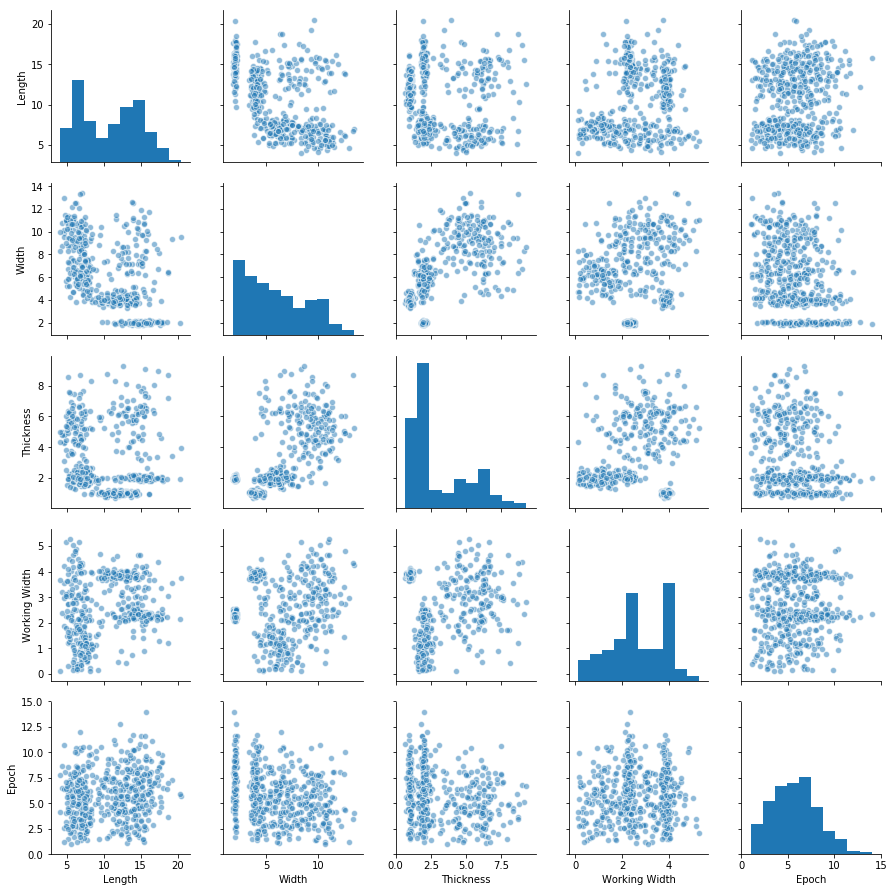

In [7]:
import seaborn as sns
sns.pairplot(data,plot_kws={'alpha':0.5})
plt.show()

In [8]:
from sklearn.cluster import KMeans

###### Возьмем количество кластеров из предыдущих вычислений. Из DBSCAN с длиной Чебышева

In [9]:
%%time
Z = KMeans(n_clusters = 8,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
Z.fit(data)

Wall time: 4.71 s


In [10]:
Z.cluster_centers_

array([[ 15.70420688,   2.14029754,   2.0411671 ,   2.39030105,   7.6581995 ],
       [ 12.86611671,   3.45996442,   1.35302937,   3.44422674,
          3.89995383],
       [ 14.35377529,   8.21107852,   5.93840352,   2.8588717 ,
          4.79343849],
       [ 11.67009708,   3.79282736,   1.17074591,   3.72410121,
          7.97434249],
       [  7.01775405,   6.03673202,   2.04781662,   1.23882714,
          7.60384034],
       [  7.06611439,   6.12517318,   2.05011285,   1.24556529,
          3.65357141],
       [  6.07887787,   9.88892013,   5.3083635 ,   3.18604441,
          7.04316281],
       [  6.4239045 ,  10.02493037,   5.35612449,   3.16081925,
          3.43584048]])

In [11]:
Z.labels_

array([2, 7, 6, 2, 0, 4, 2, 1, 5, 0, 2, 3, 0, 0, 0, 6, 2, 2, 0, 1, 4, 1, 5,
       6, 0, 0, 2, 3, 6, 5, 6, 7, 3, 1, 3, 3, 3, 0, 6, 6, 3, 3, 0, 7, 2, 1,
       5, 5, 3, 5, 7, 0, 2, 1, 4, 1, 7, 4, 6, 7, 2, 0, 2, 7, 2, 5, 5, 0, 0,
       0, 7, 2, 7, 7, 1, 6, 7, 3, 1, 2, 5, 3, 3, 0, 1, 7, 1, 4, 3, 2, 4, 6,
       6, 6, 5, 0, 5, 4, 2, 3, 4, 4, 1, 3, 4, 5, 7, 2, 2, 3, 1, 0, 4, 7, 5,
       2, 2, 6, 7, 7, 2, 5, 3, 4, 2, 6, 3, 5, 4, 7, 2, 5, 7, 3, 4, 4, 0, 5,
       6, 5, 3, 7, 6, 1, 1, 3, 1, 2, 2, 5, 2, 4, 6, 3, 1, 4, 5, 5, 2, 2, 5,
       4, 3, 0, 3, 1, 2, 2, 0, 2, 0, 1, 0, 1, 7, 1, 0, 2, 2, 4, 2, 0, 3, 2,
       0, 0, 2, 0, 0, 5, 5, 3, 7, 5, 0, 3, 1, 3, 7, 3, 2, 0, 5, 3, 4, 3, 3,
       0, 2, 1, 1, 6, 2, 7, 7, 5, 3, 6, 1, 2, 5, 3, 7, 0, 3, 1, 4, 3, 0, 7,
       2, 0, 4, 2, 7, 2, 2, 1, 4, 0, 4, 4, 1, 2, 4, 0, 5, 0, 0, 0, 0, 3, 0,
       7, 1, 1, 4, 5, 2, 0, 2, 5, 4, 6, 3, 7, 0, 5, 2, 1, 2, 7, 6, 1, 2, 1,
       7, 3, 4, 5, 3, 2, 0, 6, 7, 2, 0, 6, 4, 6, 6, 1, 3, 3, 0, 2, 4, 6, 1,
       3, 4,

In [12]:
Z.inertia_

3667.3315315563641

In [13]:
data_kmeans = data.copy() 

centers = np.zeros((8, 5))
centers[:, 0:8] = Z.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['Сluster'] = Z.labels_.astype(str)

centers['Сluster'] = np.array(['c0', 'c1', 'c2','c3', 'c4', 'c5','c6', 'c7']).astype(str)

centers

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,15.704207,2.140298,2.041167,2.390301,7.658200,c0
1,12.866117,3.459964,1.353029,3.444227,3.899954,c1
2,14.353775,8.211079,5.938404,2.858872,4.793438,c2
3,11.670097,3.792827,1.170746,3.724101,7.974342,c3
4,7.017754,6.036732,2.047817,1.238827,7.603840,c4
5,7.066114,6.125173,2.050113,1.245565,3.653571,c5
6,6.078878,9.888920,5.308363,3.186044,7.043163,c6
7,6.423905,10.024930,5.356124,3.160819,3.435840,c7


In [14]:
print("Silhouette with 8 clusters")
print(metrics.silhouette_score(data_kmeans, Z.labels_, metric='euclidean'))

Silhouette with 8 clusters
0.353054011517


In [15]:
data_kmeans = data_kmeans.append(centers, ignore_index=True)
data_kmeans.head(20)

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,14.418594,4.492233,6.228045,2.746836,4.573289,2
1,6.416955,10.661753,4.346087,3.949203,2.676545,7
2,6.583058,12.082281,4.472702,3.142853,8.083503,6
3,14.280348,5.111007,5.646974,3.025639,5.414505,2
4,15.121059,1.927749,2.046204,2.423817,7.614661,0
5,5.404853,4.228419,2.033189,1.528347,5.691051,4
6,15.568509,8.344746,9.092434,2.329226,5.109392,2
7,11.139750,4.461628,4.831434,2.404214,2.264130,1
8,6.960213,6.638441,2.116817,0.342207,4.502793,5
9,16.108227,1.897144,1.799735,2.363544,9.345614,0


###### Объекты скучковались +- около своих центров, хотя есть и явные выбросы

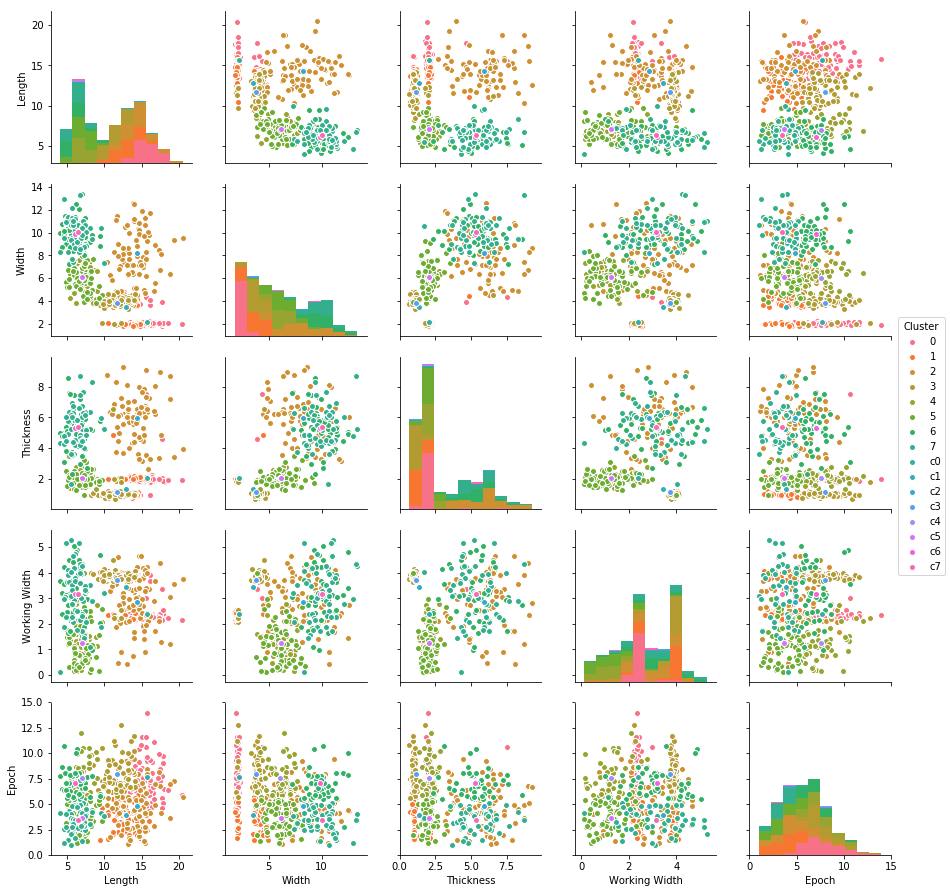

In [16]:
sns.pairplot(data_kmeans.sort_values('Сluster'), 
             hue='Сluster', 
             plot_kws={'alpha':1}, 
             vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch']
            )
plt.show()

###### Однако, давайте попробуем логтевым методом улучшить наши результаты

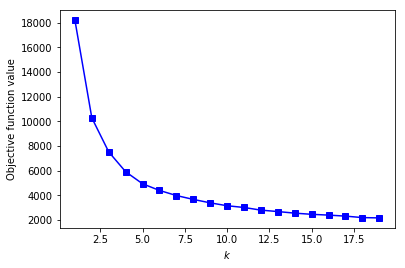

In [17]:
inertia = []
for k in range(1,20):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(data)
    inertia.append(Z.inertia_)

plt.plot(range(1, 20), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.show()

###### По графику видно, что оптимальным может являться число кластеров равное 6,7 или 8

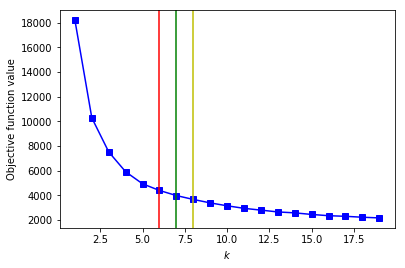

In [18]:
inertia = []
for k in range(1,20):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(data)
    inertia.append(Z.inertia_)

plt.plot(range(1, 20), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.axvline(x=6, c='r')
plt.axvline(x=7, c='g')
plt.axvline(x=8, c='y')
plt.show()

###### Попробуем посмотреть, что будет если взять число кластеров 6 и 7

In [19]:
%%time
Z = KMeans(n_clusters = 6,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
Z.fit(data)

Wall time: 3.93 s


In [20]:
Z.cluster_centers_

array([[  6.98252929,   6.10851315,   2.04663632,   1.20121343,
          5.41805543],
       [ 11.58963817,   3.81434445,   1.18441713,   3.67637693,
          8.02838025],
       [ 14.29921946,   8.19973992,   5.92968771,   2.86315068,   4.7810795 ],
       [ 12.81864452,   3.47590299,   1.36216627,   3.43155928,
          3.89194454],
       [  6.23621012,   9.9708557 ,   5.31334529,   3.16698773,
          5.10107004],
       [ 15.70420688,   2.14029754,   2.0411671 ,   2.39030105,   7.6581995 ]])

In [21]:
Z.inertia_

4395.1216096557255

In [22]:
data_kmeans = data.copy() 

centers = np.zeros((6, 5))
centers[:, 0:6] = Z.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['Сluster'] = Z.labels_.astype(str)

centers['Сluster'] = np.array(['c0', 'c1', 'c2','c3', 'c4', 'c5']).astype(str)

centers

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,6.982529,6.108513,2.046636,1.201213,5.418055,c0
1,11.589638,3.814344,1.184417,3.676377,8.028380,c1
2,14.299219,8.199740,5.929688,2.863151,4.781079,c2
3,12.818645,3.475903,1.362166,3.431559,3.891945,c3
4,6.236210,9.970856,5.313345,3.166988,5.101070,c4
5,15.704207,2.140298,2.041167,2.390301,7.658200,c5


In [23]:
print("Silhouette with 6 clusters")
print(metrics.silhouette_score(data_kmeans, Z.labels_, metric='euclidean'))

Silhouette with 6 clusters
0.417210458792


In [24]:
data_kmeans = data_kmeans.append(centers, ignore_index=True)
data_kmeans.head(20)

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,14.418594,4.492233,6.228045,2.746836,4.573289,2
1,6.416955,10.661753,4.346087,3.949203,2.676545,4
2,6.583058,12.082281,4.472702,3.142853,8.083503,4
3,14.280348,5.111007,5.646974,3.025639,5.414505,2
4,15.121059,1.927749,2.046204,2.423817,7.614661,5
5,5.404853,4.228419,2.033189,1.528347,5.691051,0
6,15.568509,8.344746,9.092434,2.329226,5.109392,2
7,11.139750,4.461628,4.831434,2.404214,2.264130,3
8,6.960213,6.638441,2.116817,0.342207,4.502793,0
9,16.108227,1.897144,1.799735,2.363544,9.345614,5


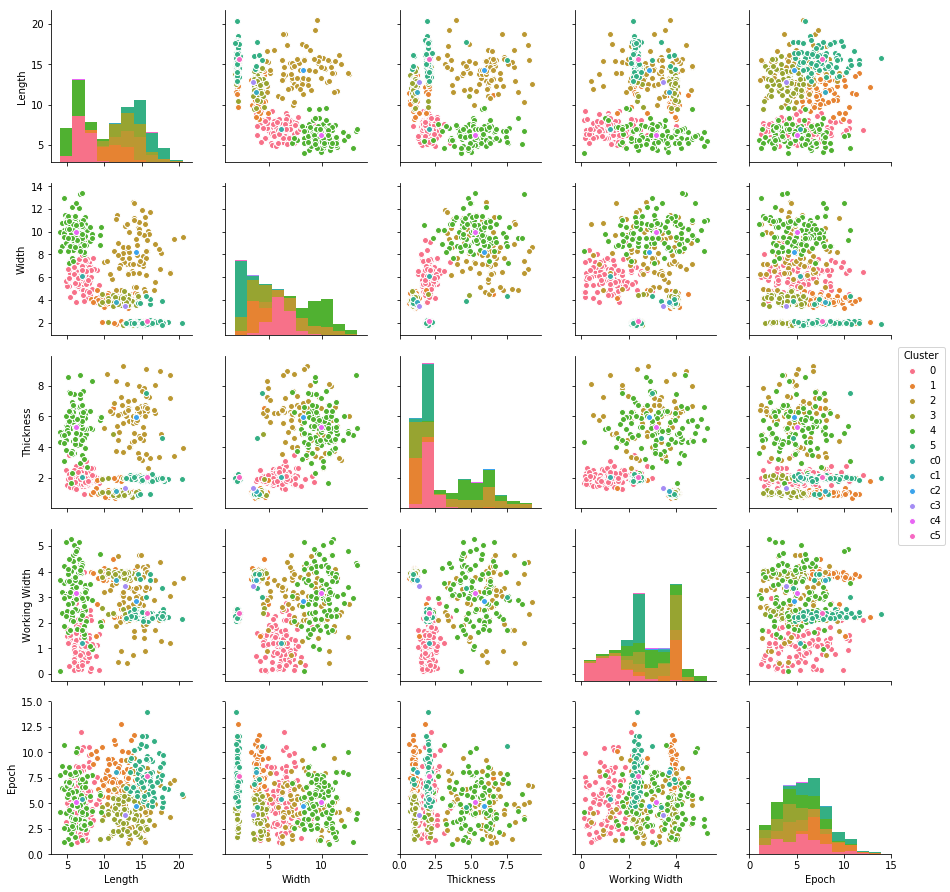

In [25]:
sns.pairplot(data_kmeans.sort_values('Сluster'), 
             hue='Сluster', 
             plot_kws={'alpha':1}, 
             vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch']
            )
plt.show()

##### Возьмем 7 кластеров

In [26]:
%%time
Z = KMeans(n_clusters = 7,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
Z.fit(data)

Wall time: 4.29 s


In [27]:
data_kmeans = data.copy() 

centers = np.zeros((7, 5))
centers[:, 0:7] = Z.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['Сluster'] = Z.labels_.astype(str)

centers['Сluster'] = np.array(['c0', 'c1', 'c2','c3', 'c4', 'c5', 'c6']).astype(str)

centers

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,12.866117,3.459964,1.353029,3.444227,3.899954,c0
1,11.670097,3.792827,1.170746,3.724101,7.974342,c1
2,15.704207,2.140298,2.041167,2.390301,7.658200,c2
3,6.237974,10.026009,5.389853,3.182803,5.105223,c3
4,14.299219,8.199740,5.929688,2.863151,4.781079,c4
5,7.045913,6.190099,2.107851,1.284116,3.638571,c5
6,6.972746,6.114706,2.067705,1.282893,7.661663,c6


In [28]:
print("Silhouette with 7 clusters")
print(metrics.silhouette_score(data_kmeans, Z.labels_, metric='euclidean'))

Silhouette with 7 clusters
0.36396215233


In [29]:
data_kmeans = data_kmeans.append(centers, ignore_index=True)
data_kmeans.head(20)

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,14.418594,4.492233,6.228045,2.746836,4.573289,4
1,6.416955,10.661753,4.346087,3.949203,2.676545,3
2,6.583058,12.082281,4.472702,3.142853,8.083503,3
3,14.280348,5.111007,5.646974,3.025639,5.414505,4
4,15.121059,1.927749,2.046204,2.423817,7.614661,2
5,5.404853,4.228419,2.033189,1.528347,5.691051,6
6,15.568509,8.344746,9.092434,2.329226,5.109392,4
7,11.139750,4.461628,4.831434,2.404214,2.264130,0
8,6.960213,6.638441,2.116817,0.342207,4.502793,5
9,16.108227,1.897144,1.799735,2.363544,9.345614,2


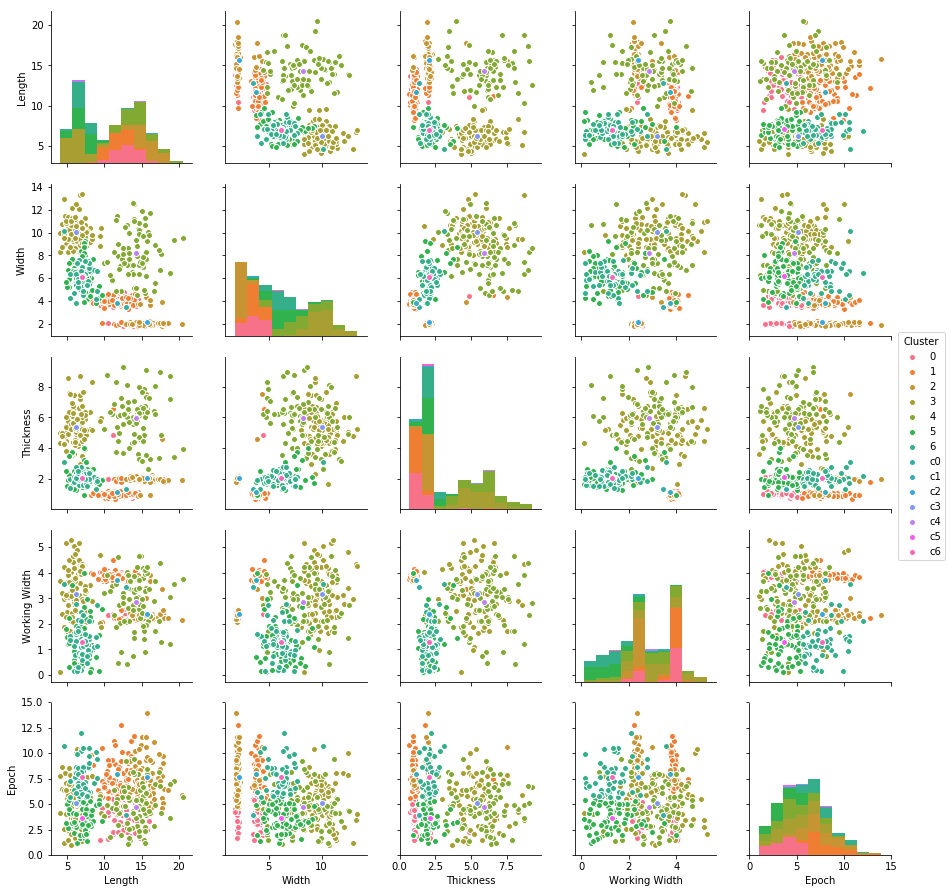

In [30]:
sns.pairplot(data_kmeans.sort_values('Сluster'), 
             hue='Сluster', 
             plot_kws={'alpha':1}, 
             vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch']
            )
plt.show()

###### Визуально стоило бы выбрать число кластеров равным 6, но лучше проверить предположение на метриках, например силуэт

In [31]:
ind =-1
Max=-1
for i in range(5,20):
    Z = KMeans(n_clusters = i,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
    Z.fit(data)
    data_kmeans = data.copy() 
    ME = metrics.silhouette_score(data_kmeans, Z.labels_, metric='euclidean')
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)



0.349735060795
6


###### Проверим на втором алгоритме Calinski-Harabaz

In [32]:
ind =-1
Max=-1
for i in range(5,20):
    Z = KMeans(n_clusters = i,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
    Z.fit(data)
    data_kmeans = data.copy() 
    ME = metrics.calinski_harabaz_score(data_kmeans, Z.labels_)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

332.544766097
5


###### Алгоритм показал, что наилучшее разбиение это разбиение на шесть или пять кластеров

###### Теперь остается только проверить на ПАМ

#### Продолжение в файле PAM

##   Часть №6-7. Интерпретация полученных данных и определение орудий труда

In [44]:
%%time
data = pd.read_csv("data.csv")
Z = KMeans(n_clusters = 5,
           init = 'random',
           n_init = 1000,
           max_iter = 10000, 
           random_state=15434,
          )
Z.fit(data)
data_kmeans = data.copy() 

Wall time: 3.26 s


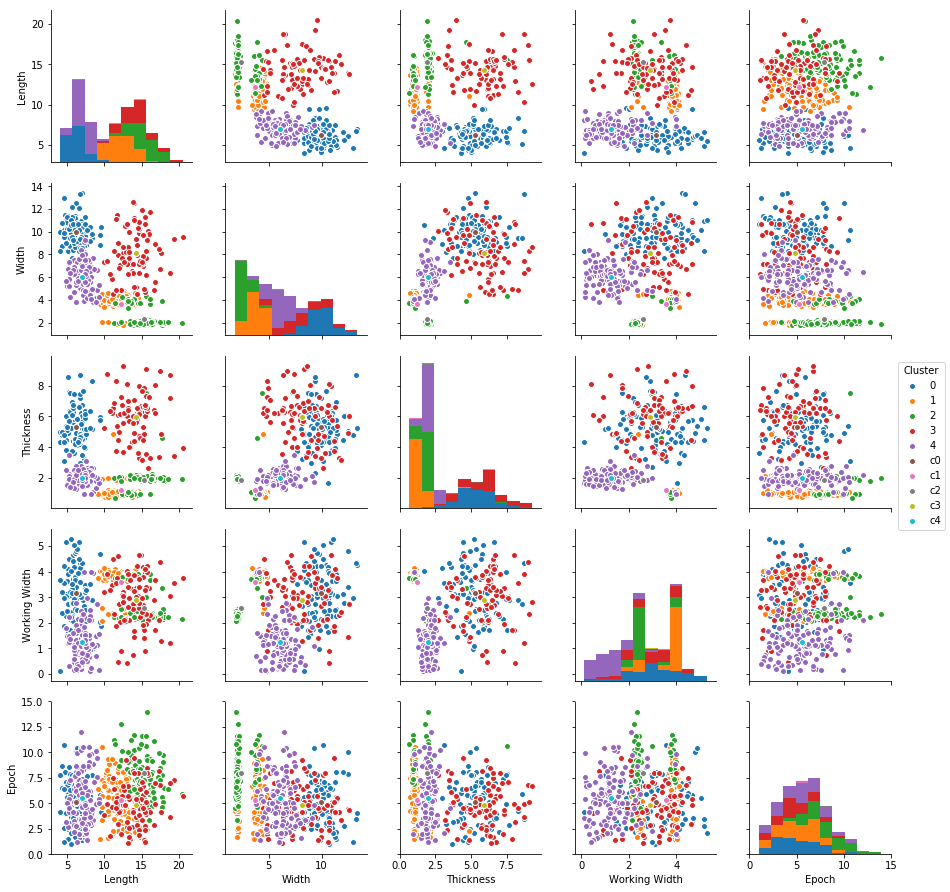

In [45]:
centers = np.zeros((5, 5))
centers[:, 0:5] = Z.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['Сluster'] = Z.labels_.astype(str)

centers['Сluster'] = np.array(['c0', 'c1', 'c2','c3', 'c4']).astype(str)

centers
data_kmeans = data_kmeans.append(centers, ignore_index=True)
data_kmeans.head(20)
sns.pairplot(data_kmeans.sort_values('Сluster'), 
             hue='Сluster', 
             plot_kws={'alpha':1}, 
             vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch']
            )
plt.show()

### Интерпретация полученных данных

##### Перед тем, как перейти непосредственно к интерпретации, я бы хотел отметить, что выбрал это разбиение исключительно полагаясь на метрики. Только потому, что другие показывали худшие результаты, разбивая объекты на пять кластеров.

In [49]:
centers

,Length,Width,Thickness,Working Width,Epoch,Сluster
0,6.236210,9.970856,5.313345,3.166988,5.101070,c0
1,12.177543,3.661962,1.227015,3.585084,5.281436,c1
2,15.241924,2.367242,1.894787,2.581531,7.954974,c2
3,14.260923,8.154397,5.937399,2.883401,4.814305,c3
4,7.041179,6.042450,2.021544,1.266165,5.564048,c4


#### Сразу хочется отметить, что все кластеры очень сильно отличаются друг от друга:
1. Первый кластер отличается наименьшей длиной и наибольшей шириной, в купе с почти что самым большим параметром толщины камня. Это отличает его от остальных
2. Второй кластер отличается наименьшим параметром толщины и наибольшим параметром рабочей поверхности
3. Третий кластер включает в себя объекты с наибольшей длиной и наименьшей шириной камня и наибольшим параметром эпохи
4. Четвертый кластер имеет наибольшую толщину камня и почти что самую большую длину. Отличается от предыдущего кластера тем, что у него также большая ширина камня
5. Объекты пятого кластера отличаются от остальных тем, что имеют наименьшую рабочую поверхность и довольно маленькую толщину камня

##### Из-за всего этого можно утверждать, что разбиение по кластерам получилось удачным, так как все кластеры отличаются друг от друга и нет близких. Ведь они различаются хотя бы по одному-двум параметрам, что очень важно, когда речь идет об инструменте

### Предположительные орудия труда

1. Возможно, что первый кластер это рубило, тк самая маленькая длина,средняя ширина,  и одна из самых больших толщин камня
2. Тогда второй походит на резец, тк большая длина, одна из самых маленьких ширин и самая большая рабочая поверхность
3.  Допустим, что кластер номер три это гарпун, тк большая длина, небольшая ширина и небошая рабочая поверхность
4. Четвертый напоминает колун-кливер, тк большая, но меньшая, чем у горпуна длина, почти самая большая ширина и самая большая толщина камня
5. Тогда возможно, что пять это чоппинг, тк маленькая длина, ширина, и тем более рабочая поверхность